In [28]:
import numpy as np

rng = np.random.default_rng(seed=42)
m = 200 # number of instances
X = 2 * rng.random((m, 1))
y = 4 + 3 * X + rng.standard_normal((m, 1))

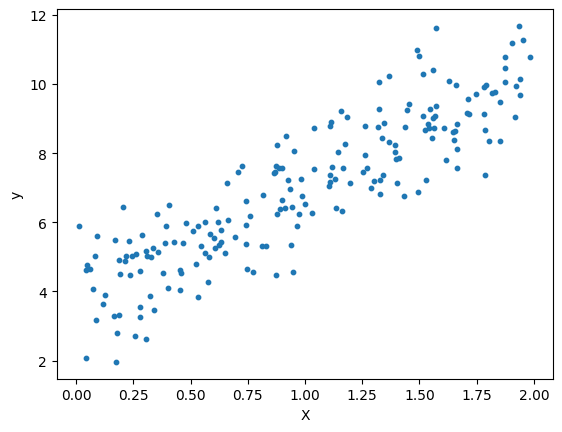

In [29]:
import matplotlib.pyplot as plt

plt.scatter(X, y, s=10)
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [30]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [31]:
theta_best

array([[3.69084138],
       [3.32960458]])

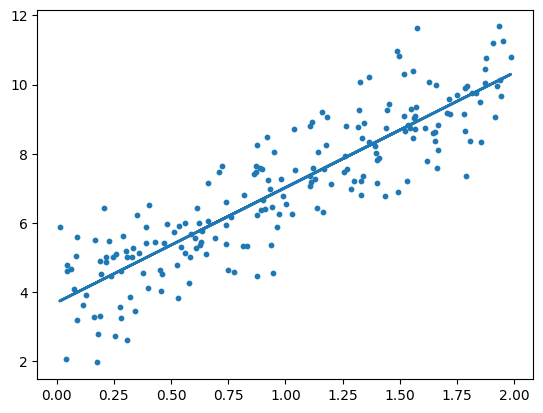

array([[3.69084138],
       [3.32960458]])

In [32]:
theta_best = theta_best.reshape(-1, 1)

y_pred = X_b @ theta_best

plt.scatter(X, y, s=10)
plt.plot(X, y_pred, linewidth=2)
plt.show()

theta_best


In [33]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_pred = X_new_b @ theta_best
y_pred

array([[ 3.69084138],
       [10.35005055]])

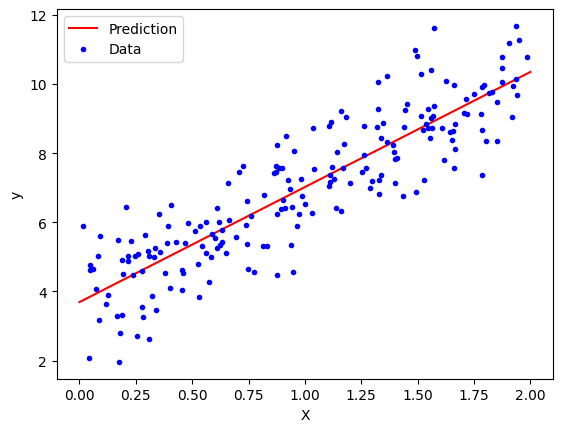

In [34]:
plt.plot(X_new, y_pred, 'r-', label='Prediction')
plt.plot(X, y, 'b.', label='Data')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [35]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_


(array([3.69084138]), array([[3.32960458]]))

In [36]:
lin_reg.predict(X_new)

array([[ 3.69084138],
       [10.35005055]])

In [37]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond= 1e-6)
theta_best_svd

array([[3.69084138],
       [3.32960458]])

In [38]:
np.linalg.pinv(X_b) @ y

array([[3.69084138],
       [3.32960458]])

In [39]:
# try out batch gd!

eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initilization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta=theta - eta * gradients
    
theta

array([[3.69084138],
       [3.32960458]])

In [41]:
# stochastic gd w/ simple learning rate schedule

n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # random initilization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index + 1]
        yi = y[random_index: random_index + 1]
        gradients = (2/1) * xi.T.dot(xi.dot(theta) - yi) 
        eta = learning_schedule(epoch * m + i)
        
        theta = theta - eta * gradients
print("Stochastic GD theta:", theta)

Stochastic GD theta: [[3.54324462]
 [3.47763562]]
